In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

df = pd.read_csv('250_Dataset_Cleaned.csv') # Read csv

In [2]:
df.columns

Index(['Movie_name', 'Release_Year', 'IMDB_Rating', 'Metascore',
       'Reviewer_count', 'Censor_Board_Rating', 'Genre_1', 'Genre_2',
       'Genre_3', 'Director', 'Writer_1', 'Writer_2', 'Star_1', 'Star_2',
       'Star_3', 'Plot_Keywords', 'Budget', 'Gross_USA', 'Cum_Worldwide_Gross',
       'Production_Company', 'Length_in_minutes', 'Release_Month'],
      dtype='object')

In [3]:
df.head()
df_top100=df.head(n=100) ##choose only top 100

In [4]:
df_for_ml=df_top100.copy()
label_encoder= LabelEncoder()
df_for_ml = df_for_ml.fillna('NaN')
label_encoder.fit(df_for_ml[['Genre_1','Genre_2','Director','Star_1','Censor_Board_Rating','Production_Company']].stack().unique())
df_for_ml['Genre_1'] = label_encoder.transform(df_for_ml['Genre_1'])
df_for_ml['Genre_2'] = label_encoder.transform(df_for_ml['Genre_2'])
df_for_ml['Director'] = label_encoder.transform(df_for_ml['Director'])
df_for_ml['Star_1'] = label_encoder.transform(df_for_ml['Star_1'])
df_for_ml['Production_Company'] = label_encoder.transform(df_for_ml['Production_Company'])
df_for_ml['Censor_Board_Rating'] = label_encoder.transform(df_for_ml['Censor_Board_Rating'])
df_for_ml.sample(10)

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,...,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
4,Schindler's List,1993,8.9,94.0,1174098,169,25,64,History,216,...,126,Ralph Fiennes,Ben Kingsley,accountant|champagne|villa|womanizer|soap,22000000.0,96898818.0,322287794.0,234,195.0,2
53,WALL·E,2008,8.4,95.0,968414,165,15,6,Family,14,...,24,Elissa Knight,Jeff Garlin,robot|obesity|recycling robot|adrift in space|...,180000000.0,223808164.0,521311860.0,79,98.0,7
39,The Intouchables,2011,8.5,57.0,731500,191,25,51,Drama,168,...,84,Omar Sy,Anne Le Ny,class differences|caregiver|black white friend...,9500000.0,10198820.0,426588510.0,189,112.0,3
94,L.A. Confidential,1997,8.2,90.0,518609,191,53,64,Mystery,55,...,122,Russell Crowe,Guy Pearce,corruption|murder|call girl|neo noir|arizona,35000000.0,64616940.0,126216940.0,193,138.0,9
18,Se7en,1995,8.6,65.0,1391046,2,53,64,Mystery,60,...,156,Brad Pitt,Kevin Spacey,serial killer|detective|serial murder|seven de...,33000000.0,100125643.0,327333559.0,39,127.0,9
63,American Beauty,1999,8.3,84.0,1043504,169,64,0,,207,...,122,Annette Bening,Thora Birch,adulterous wife|cheating wife|midlife crisis|u...,15000000.0,130096601.0,356296601.0,65,122.0,1
86,Lawrence of Arabia,1962,8.3,100.0,259483,165,6,25,Drama,61,...,182,Alec Guinness,Anthony Quinn,desert|arab|bedouin|ottoman empire|british mil...,15000000.0,45306425.0,45710874.0,99,228.0,12
7,"Il buono, il brutto, il cattivo",1966,8.8,90.0,667396,165,252,0,,209,...,47,Eli Wallach,Lee Van Cleef,spaghetti western|shootout|famous opening them...,1200000.0,25100000.0,25252481.0,188,161.0,12
6,Pulp Fiction,1994,8.9,94.0,1768349,2,53,64,,190,...,116,Uma Thurman,Samuel L. Jackson,nonlinear timeline|overdose|drug overdose|bond...,8000000.0,107928762.0,222831519.0,154,154.0,11
8,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,1609963,169,4,6,Drama,181,...,72,Ian McKellen,Orlando Bloom,ring|quest|hobbit|elf|orc,93000000.0,315544750.0,887840287.0,163,178.0,12


In [5]:
X = df_for_ml[['Genre_1','Genre_2','Star_1','Director','Release_Year','Censor_Board_Rating','Budget','Length_in_minutes','Gross_USA','Production_Company']]


In [6]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_init=4,max_iter = 500,random_state=9)
kfit = kmeans.fit(X)
identified_clusters = kfit.predict(X)


In [8]:
#Appending the identified clusters to the original data
clustered_data = df_top100.copy()
clustered_data['Cluster'] = identified_clusters
#Viewing the data with clusters
display(clustered_data.sort_values(by='Cluster'))

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,...,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month,Cluster
0,The Shawshank Redemption,1994,9.3,80.0,2260257,PG,Drama,,,Frank Darabont,...,Morgan Freeman,Bob Gunton,wrongful imprisonment|based on the works of st...,25000000.0,28699976.0,28815245.0,Castle Rock Entertainment,142.0,10,0
35,Modern Times,1936,8.5,96.0,209175,Not Rated,Comedy,Drama,Family,Charles Chaplin(as Charlie Chaplin),...,Paulette Goddard,Henry Bergman,jail|actor director writer|music score compose...,1500000.0,163577.0,457688.0,Charles Chaplin Productions,87.0,2,0
37,City Lights,1931,8.5,99.0,160927,G,Comedy,Drama,Romance,Charles Chaplin,...,Virginia Cherrill,Florence Lee,the little tramp character|slapstick comedy|bl...,1500000.0,19181.0,46008.0,Charles Chaplin Productions,87.0,3,0
39,The Intouchables,2011,8.5,57.0,731500,R,Biography,Comedy,Drama,Olivier Nakache,...,Omar Sy,Anne Le Ny,class differences|caregiver|black white friend...,9500000.0,10198820.0,426588510.0,"Quad Productions,Ten Films,Canal+",112.0,3,0
40,Whiplash,2014,8.5,88.0,683730,R,Drama,Music,,Damien Chazelle,...,J.K. Simmons,Melissa Benoist,drummer|music school|new york city|conservator...,3300000.0,13092000.0,48982041.0,"Bold Films,Blumhouse Productions,Right of Way ...",106.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Coco,2017,8.4,81.0,345743,PG,Animation,Adventure,Family,Lee Unkrich,...,Gael García Bernal,Benjamin Bratt,mexico|death|afterlife|male protagonist|day of...,175000000.0,209726015.0,807082196.0,"Walt Disney Pictures,Pixar Animation Studios",105.0,11,7
11,Inception,2010,8.8,74.0,1983050,PG-13,Action,Adventure,Sci-Fi,Christopher Nolan,...,Joseph Gordon-Levitt,Ellen Page,dream|subconscious|ambiguous ending|surprise e...,160000000.0,292576195.0,829899072.0,"Warner Bros.,Legendary Entertainment,Syncopy",148.0,7,7
97,Batman Begins,2005,8.2,70.0,1269619,PG-13,Action,Adventure,,Christopher Nolan,...,Michael Caine,Ken Watanabe,social decay|dc comics|superhero|well|deception,150000000.0,206852432.0,379680185.0,"Warner Bros.,Syncopy,DC Comics",140.0,6,7
53,WALL·E,2008,8.4,95.0,968414,Not Rated,Animation,Adventure,Family,Andrew Stanton,...,Elissa Knight,Jeff Garlin,robot|obesity|recycling robot|adrift in space|...,180000000.0,223808164.0,521311860.0,"FortyFour Studios,Pixar Animation Studios,Walt...",98.0,7,7


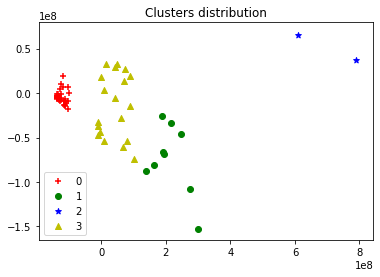

In [9]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if clustered_data.Cluster[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
    elif clustered_data.Cluster[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
    elif clustered_data.Cluster[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')
    elif clustered_data.Cluster[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',
    marker='^')   
pl.legend([c1, c2, c3,c4], ['0', '1','2','3'])
pl.title('Clusters distribution')
pl.show()

In [22]:
clustered_data[clustered_data["Cluster"]==0][['Movie_name', 'Genre_1','Star_1','Director','Gross_USA','Release_Year']].sort_values(by=['Genre_1'])


,Movie_name,Genre_1,Star_1,Director,Gross_USA,Release_Year
57,Oldeuboi,Action,Min-sik Choi,Chan-wook Park,707481.0,2003
65,Das Boot,Adventure,Jürgen Prochnow,Wolfgang Petersen,11487676.0,1981
42,Hotaru no haka,Animation,Tsutomu Tatsumi,Isao Takahata,516962.0,1988
24,Sen to Chihiro no kamikakushi,Animation,Daveigh Chase,Hayao Miyazaki,13750644.0,2001
39,The Intouchables,Biography,François Cluzet,Olivier Nakache,10198820.0,2011
99,Der Untergang,Biography,Bruno Ganz,Oliver Hirschbiegel,5509040.0,2004
35,Modern Times,Comedy,Charles Chaplin,Charles Chaplin(as Charlie Chaplin),163577.0,1936
37,City Lights,Comedy,Charles Chaplin,Charles Chaplin,19181.0,1931
85,Amélie,Comedy,Audrey Tautou,Jean-Pierre Jeunet,33225499.0,2001
82,Singin' in the Rain,Comedy,Gene Kelly,Stanley Donen,1826108.0,1952


In [19]:
clustered_data[clustered_data["Cluster"]==1][['Movie_name', 'Genre_1','Star_1','Director','Production_Company','Gross_USA']].sort_values(by=['Genre_1'])

,Movie_name,Genre_1,Star_1,Director,Production_Company,Gross_USA
8,The Lord of the Rings: The Fellowship of the Ring,Action,Elijah Wood,Peter Jackson,"New Line Cinema,WingNut Films,The Saul Zaentz ...",315544750.0
12,Star Wars: Episode V - The Empire Strikes Back,Action,Mark Hamill,Irvin Kershner,Lucasfilm,290271960.0
22,Star Wars,Action,Mark Hamill,George Lucas,"Lucasfilm,Twentieth Century Fox",460998507.0
68,Star Wars: Episode VI - Return of the Jedi,Action,Mark Hamill,Richard Marquand,Lucasfilm,309306177.0
5,The Lord of the Rings: The Return of the King,Adventure,Elijah Wood,Peter Jackson,"New Line Cinema,WingNut Films,The Saul Zaentz ...",377845905.0
13,The Lord of the Rings: The Two Towers,Adventure,Elijah Wood,Peter Jackson,"New Line Cinema,WingNut Films,The Saul Zaentz ...",342551365.0
30,The Lion King,Animation,Matthew Broderick,Roger Allers,"Walt Disney Pictures,Walt Disney Animation Stu...",422783777.0
49,Joker,Crime,Joaquin Phoenix,Todd Phillips,"Warner Bros.,Village Roadshow Pictures,BRON St...",335451311.0
10,Forrest Gump,Drama,Tom Hanks,Robert Zemeckis,Paramount Pictures,330455270.0


In [21]:
clustered_data[clustered_data["Cluster"]==2][['Movie_name', 'Genre_1','Star_1','Director','Gross_USA']].sort_values(by=['Genre_1'])

,Movie_name,Genre_1,Star_1,Director,Gross_USA
54,Avengers: Infinity War,Action,Robert Downey Jr.,Anthony Russo,678815482.0
59,Avengers: Endgame,Action,Robert Downey Jr.,Anthony Russo,858373000.0


In [18]:
clustered_data[clustered_data["Cluster"]==3][['Movie_name', 'Genre_1','Star_1','Director','Gross_USA']].sort_values(by=['Genre_1'])

,Movie_name,Genre_1,Star_1,Director,Gross_USA
48,Raiders of the Lost Ark,Action,Harrison Ford,Steven Spielberg,248159971.0
36,Gladiator,Action,Russell Crowe,Ridley Scott,187705427.0
33,Terminator 2: Judgment Day,Action,Arnold Schwarzenegger,James Cameron,205881154.0
92,Indiana Jones and the Last Crusade,Action,Harrison Ford,Steven Spielberg,197171806.0
14,The Matrix,Action,Keanu Reeves,Lana Wachowski(as The Wachowski Brothers),171479930.0
31,Back to the Future,Adventure,Michael J. Fox,Robert Zemeckis,211159762.0
70,Inglourious Basterds,Adventure,Brad Pitt,Quentin Tarantino,120540719.0
55,Spider-Man: Into the Spider-Verse,Animation,Shameik Moore,Bob Persichetti,190241310.0
66,Toy Story,Animation,Tom Hanks,John Lasseter,222498679.0
88,The Sting,Comedy,Paul Newman,George Roy Hill,156000000.0
